In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [95]:
class EDA:
    def __init__(self,data_path):
        self.data = pd.read_csv(data_path,header=0,skip_blank_lines=True)
    
    def first_look(self):
        missing_data = self.data.isna()
        missing_data_amount = missing_data.sum().sum()
        
        print(f'There are {missing_data_amount} missing values in the dataset.')
        
        print(self.data.columns)
    
    def preprocessing(self):
        na_threshold = len(self.data)*50/100
        
        self.data = self.data.dropna(thresh=na_threshold, axis=1)
        self.data = self.data.drop(columns= ['id', 'url', 'policy_code'])
        self.data = self.data.drop(columns=['zip_code','sub_grade', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 
                                            'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'last_credit_pull_d'])
        self.data = self.data.drop(columns=['last_pymnt_d', 'total_bc_limit', 'total_pymnt', 'total_pymnt_inv', 
                                            'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 
                                            'total_rev_hi_lim', 'initial_list_status'])
        self.data = self.data.drop(columns=['all_util', 'open_acc_6m', 'inq_last_12m', 'open_act_il', 
                                            'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 
                                            'inq_fi', 'max_bal_bc','il_util', 'num_tl_120dpd_2m', 
                                            'mths_since_rcnt_il'])
        
        self.data = self.data.dropna(subset=['grade'])
        self.data.drop_duplicates(inplace= True)
        
        return self.data
    
    def outlier_removal(self):
        self.data = self.data[(self.data['annual_inc'] <250000) & (self.data['annual_inc'] >1000)]
        self.data = self.data[self.data['avg_cur_bal'] <60000]
        
    def status_mapping_visualize(self):

        loan_type_dict = {
            'Fully Paid': 'Good',
            'Charged Off': 'Bad',
            'Current': 'Good',
            'Default': 'Bad',
            'Late (31-120 days)': 'Bad',
            'In Grace Period': 'Bad',
            'Late (16-30 days)': 'Bad',
            'Does not meet the credit policy. Status:Fully Paid': 'Good',
            'Does not meet the credit policy. Status:Charged Off': 'Bad'
        }

        self.data['loan_type'] = self.data['loan_status'].map(loan_type_dict)
        
        plt.figure(figsize=(12,6))
        ax = sns.countplot(x="loan_type", data=self.data,palette="Set2")
        ax = plt.xlabel('Loan Type')
        ax = plt.ylabel('Frequency')
        ax = plt.title('Loan Type Distribution')
    
    def dist_loans_visualization(self):
        self.data['issue_d'] = pd.to_datetime(self.data['issue_d'])
        year_dist = self.data.groupby(['issue_d']).size()

        plt.figure(figsize=(15,6))
        sns.set()

        ax1 = plt.subplot(1, 2, 1)
        ax1 = year_dist.plot()
        ax1 = plt.title('Loan Issued Amount By Year')
        ax1 = plt.xlabel('Year')
        ax1 = plt.ylabel('Frequency')

        ax2 = plt.subplot(1, 2, 2)
        ax2 = sns.distplot(self.data['loan_amnt'])
        ax2 = plt.title('Loan Amount Distribution')
        ax2 = plt.xlabel('Loan Amount')
        
    def income_balance_visualization(self):
        
        plt.figure(figsize=(15,6))
        sns.set()

        ax1 = plt.subplot(1, 2, 1)
        ax1 = self.data['annual_inc'].hist(bins=30)
        ax1 = plt.title('Annual Incomes', size = 20)
        ax1 = plt.xlabel('Amount', size=12)
        ax1 = plt.ylabel('Frequency of Salaries', size=12)

        ax2 = plt.subplot(1, 2, 2)
        ax2 = self.data['avg_cur_bal'].hist(bins=30)
        ax2 = plt.title('Loan Amount Distribution')
        ax2 = plt.xlabel('balance_value')
        ax2 = plt.ylabel('Frequency of Balances')
        
    def annual_income_default_visualization(self):
        plt.figure(figsize=(11,6))

        ax = sns.boxplot(x="loan_type", y="annual_inc",  data=self.data,showfliers=False,palette='Set2')
        ax = plt.xlabel('Loan Type')
        ax = plt.ylabel('Annual Income')
        ax = plt.title('Loan Type Distribution By Annual Income')

    def employment_default_visualization(self):
        
        plt.figure(figsize=(15,7))
        groupby_obj = self.data.groupby(['emp_length','loan_type']).size().unstack().T
        cols = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']
        groupby_obj = groupby_obj[cols]
        r = range(11)

        ax = plt.bar(r, groupby_obj.values[0], color='#f9966b', edgecolor='white',label='Bad')

        ax = plt.bar(r, groupby_obj.values[1], bottom=groupby_obj.values[0], color='#7fd1b8', edgecolor='white',label='Good')
        names = groupby_obj.columns
        ax = plt.xticks(r, names)
        ax = plt.legend(loc='upper right')
        ax = plt.xlabel('Employment Length')
        ax = plt.ylabel('Frequency')
        ax = plt.title('Loan Type Distribution By Employment Length')
    
    def interest_income_visualization(self):
        plt.figure(figsize=(13,7))
        groupby_obj = self.data.sample(frac=0.005,random_state=1)
        sns.set_style("white")
        ax = sns.regplot(x="annual_inc", y="int_rate", data=groupby_obj,color='#dbdb64')
        ax = plt.xlabel('Annual Income')
        ax = plt.ylabel('Interest Rate')
        ax = plt.title('Interest Rate Versus Annual Income')
    
    def grade_status_visualization(self):
        
        plt.figure(figsize=(15, 10))
        grade = sorted(self.data.grade.unique().tolist())
        sns.countplot(x='grade', data=self.data, hue='loan_type', order=grade)
    
    def term_status_visualization(self):
        
        plt.figure(figsize=(15,6))
        sns.set()

        ax1 = plt.subplot(1, 2, 1)
        ax1 = sns.countplot(x="term", data=self.data, palette="Set2")
        ax1 = plt.title('Loan Term Distribution', size = 20)
        ax1 = plt.xlabel('Term', size=12)
        ax1 = plt.ylabel('Frequency in Data', size=12)

        ax2 = plt.subplot(1, 2, 2)
        ax2 = sns.countplot(x="term", data=self.data[self.data['loan_type'] == 'Bad'], palette="Set2")
        ax2 = plt.title('Loan Term Distribution in Bad Loans')
        ax2 = plt.xlabel('Term')
        ax2 = plt.ylabel('Frequency in Bad loans')
    
    def interest_grade_visualization(self):
        
        print(self.data.groupby('loan_type')['int_rate'].describe()) 
        
        plt.figure(figsize=(10,6))
        plot_data = self.data.groupby('grade')['int_rate'].mean()
        ax = sns.barplot(x=plot_data.index,y=plot_data.values,palette='OrRd')
        ax = plt.xlabel('Loan Grade')
        ax = plt.ylabel('Interest Rate')
        ax = plt.title('Interest Rate Versus Loan Grade')
    
    def loan_purpose_visualization(self):
        plt.figure(figsize=(13,6))
        sns.set()
        
        
        ax1 = plt.subplot(1, 2, 1)
        ax1 = sns.countplot(y=self.data['purpose'],order = self.data['purpose'].value_counts().index)
        ax1 = plt.title('Loan Purpose Distribution')
        ax1 = plt.ylabel('Loan Purposes')
        ax1 = plt.xlabel('Frequency')

        ax2 = plt.subplot(1, 2, 2)
        ax2 = sns.boxplot(y="purpose", x="loan_amnt", data=self.data)
        ax2 = plt.xlabel('Loan Amount')
        ax2 = plt.ylabel('Loan Purpose')
        ax2 = plt.title('Loan Amount Versus Purpose')
        
        plt.tight_layout()
    

In [96]:
loan_df = EDA('accepted_2007_to_2018Q4.csv')

In [97]:
loan_df.first_look()

There are 108486249 missing values in the dataset.
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)


Our dataset deals with predicting the loan status of loan given some characteristics, like loan tenure, interest rate offered, some characteristics of borrower, like employment status etc.

We will be doing some EDA on this dataset, and penning down some of observations in the end

As we can see in the first look of data, we have 151 columns in our dataset and there are many missing values. So as a preprocessing step, we will all together remove the columns which contains more than 50 percent null values

Secondly, some of these columns are redundant( for ex - id and url do not tell us anything), and do not convey much information to us, so we will be removing them too.

Grade for borrowers is sufficent for us, so we do not need subgrade and related information, many of the columns contain overlapping information too. 

all settlement info (as this is redundant info- if the loan wasnt paid off entirely they will be in settlement)

Additionally, we will be removing duplicate entries too

In [98]:
loan_df_preprocessed = loan_df.preprocessing()


In [99]:
loan_df_preprocessed.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,leadman,10+ years,MORTGAGE,...,76.9,0.0,0.0,0.0,178050.0,7746.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,Engineer,10+ years,MORTGAGE,...,97.4,7.7,0.0,0.0,314017.0,39475.0,24667.0,N,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,truck driver,10+ years,MORTGAGE,...,100.0,50.0,0.0,0.0,218418.0,18696.0,14877.0,N,Cash,N
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,Information Systems Officer,10+ years,MORTGAGE,...,100.0,0.0,0.0,0.0,381215.0,52226.0,18000.0,N,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,Contract Specialist,3 years,MORTGAGE,...,96.6,60.0,0.0,0.0,439570.0,95768.0,88097.0,N,Cash,N


# Let's start by doing some visualizations now and then do some analysis:-

### Loan Distribution

Let's start by looking at the distribution of the loans, i.e change in the number of loans applied over time, and their amounts

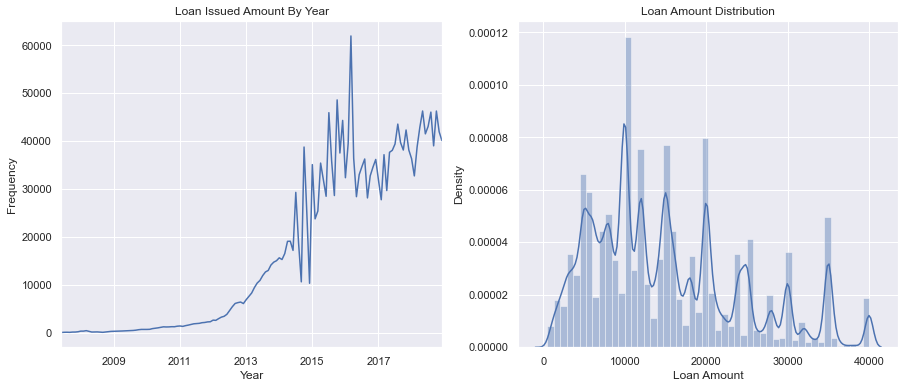

In [100]:
loan_df.dist_loans_visualization()

Observation:-

The time series plot on the left shows a rising popularity of loan lending after 2011. The trend becomes unstable but continue to grow after the year of 2014.<br> 

The distribution of loan amount is slightly skewed to the right. Most borrowers applied loan of around $10,000.

### Checking for Outlier Values:-

Lets take a look at annual income and average current balance plot to understand the loans applied by borrowers. Since annual income largely influences the loan amount given by lenders:-

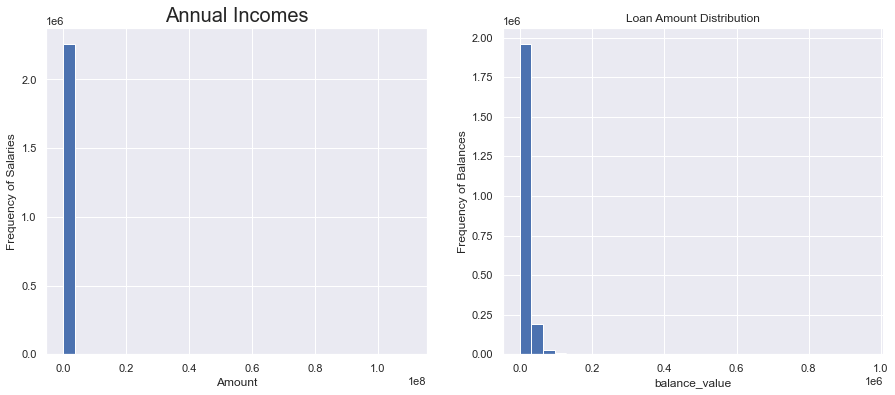

In [101]:
loan_df.income_balance_visualization()

There is something clearly wrong with the data, and it contains an outlier, which we see in the above plot, which needs to be handled. Let us understand more about the annual income:-

In [102]:
loan_df_preprocessed['annual_inc'].describe()

count    2.260664e+06
mean     7.799243e+04
std      1.126962e+05
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.300000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

In [103]:
loan_df_preprocessed['avg_cur_bal'].describe()

count    2.190322e+06
mean     1.354780e+04
std      1.647408e+04
min      0.000000e+00
25%      3.080000e+03
50%      7.335000e+03
75%      1.878300e+04
max      9.580840e+05
Name: avg_cur_bal, dtype: float64

**Annual Income:-**

So we can see that the maximum value devaites from the mean a lot, Checking the descriptive statistics with .describe enable us to see that there is a large jump from 75% to Max, indicating large values as the outliers as the mean is close to 75% as well. Minimum value is 0 as well, which doesn't make sense

It makes sense to truncate the annual income from 1000 to 200,000 lets say to have a more meaningful data

**Average Current Balance:-**

Similar argument for current balance, so it makes sense to cap current balance as well to lets say 60000:-

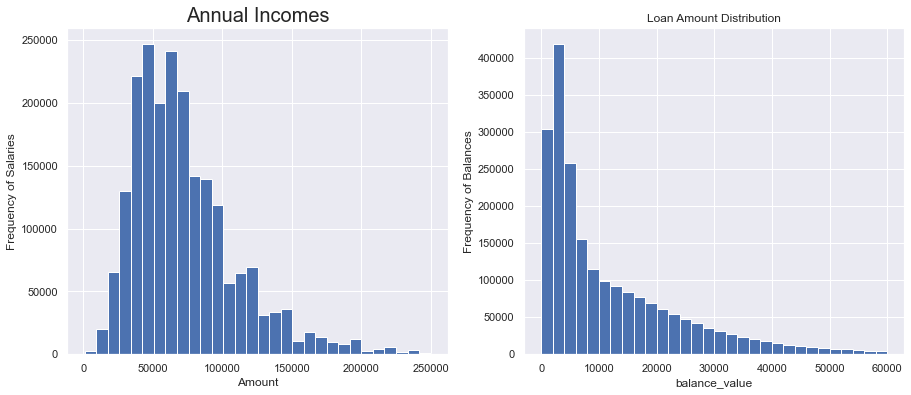

In [104]:
loan_df.outlier_removal()
loan_df.income_balance_visualization()

The plots are much better now :)

### Loan Purpose Visualization and Observation:-

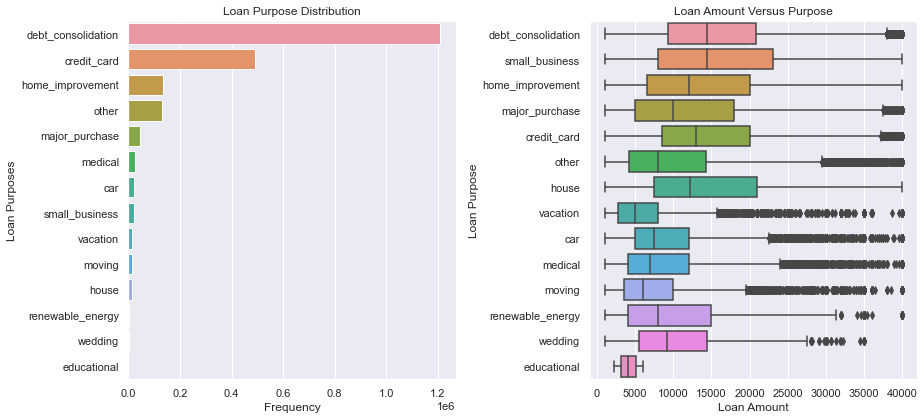

In [105]:
loan_df.loan_purpose_visualization()

**Observation**:-

The top purposes with the highest loan amount are credit card, small business, debt consolidation, home improvement and house.<br>
The most common reason for a loan request is debt consolidation, followed by credit card and home improvement.

### Loan Status Visualization and Observation:-

Our target column is 'loan_status', which tells us the status of the loan. As per the lending club website, the meaning of each of the terms is as follows:-

**Current**: Loan is up to date on all outstanding payments. <br>
**In Grace Period**: Loan is past due but within the 15-day grace period. <br>
**Late (16-30)**: Loan has not been current for 16 to 30 days. <br>
**Late (31-120)**: Loan has not been current for 31 to 120 days. <br>
**Fully paid**: Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment. <br>
**Default**: Loan has not been current for an extended period of time. <br>
**Charged Off**: Loan for which there is no longer a reasonable expectation of further payments. Upon Charge Off, the remaining principal balance of the Note is deducted from the account balance. <br>

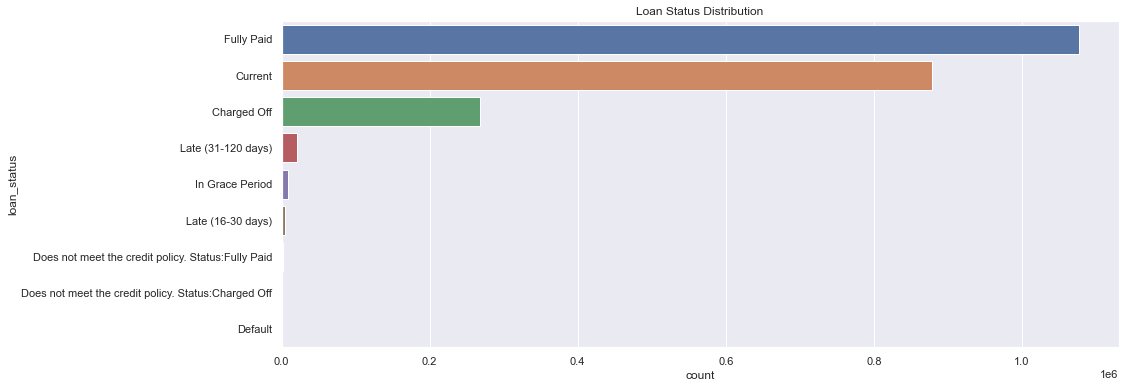

In [106]:
plt.figure(figsize=(15,6))
ax = sns.countplot(y=loan_df_preprocessed['loan_status'],order = loan_df_preprocessed['loan_status'].value_counts().index)
ax = plt.title('Loan Status Distribution')

In [107]:
loan_df_preprocessed['loan_status'].value_counts(normalize=True)

Fully Paid                                             0.476298
Current                                                0.388521
Charged Off                                            0.118796
Late (31-120 days)                                     0.009496
In Grace Period                                        0.003732
Late (16-30 days)                                      0.001924
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000018
Name: loan_status, dtype: float64

#### Observation:-

One interesting finding is that there is a drastically lower Default percentage than expected. This is most likely due to the prevalence of restructuring loans, in order to pad the numbers of Lending Club and present the best foot forward for potential investors- in both the loans themselves and the company's stock. The fact that 'Current' and 'In Grace Period' account for more than 40% of the data is unfortunate. 

We can create a dictionary or mapping to map these categories to Good or Bad to perform further analysis on the data, the details of which are mentioned in the EDA class above. Current loans are taken as good loans as an assumption

The below plot visualizes the distribution after creating this mapping:-

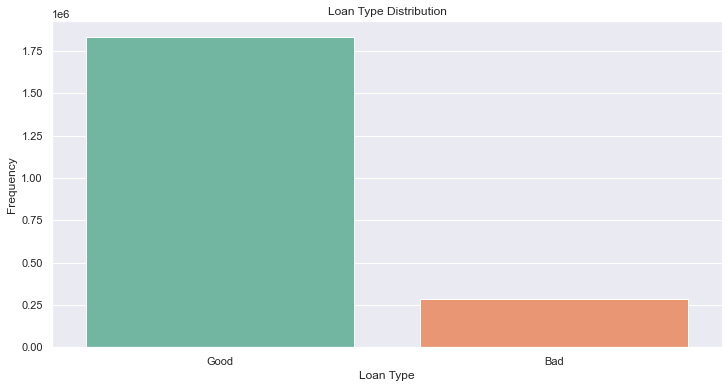

In [108]:
loan_df.status_mapping_visualize()

The dataset is highly imbalanced where the number of good loan is much higher than the bad loan

### Effect of Annual Income on Loan Status:-

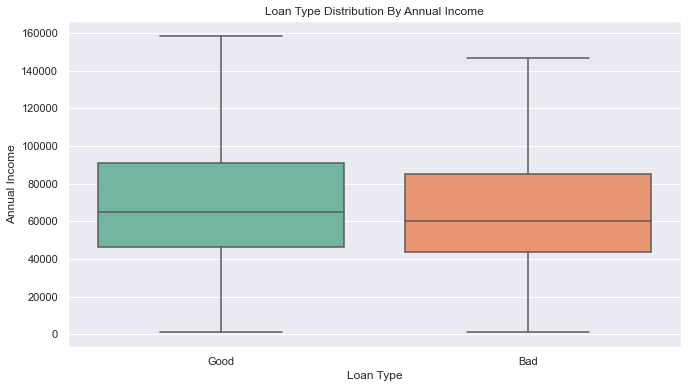

In [109]:
loan_df.annual_income_default_visualization()

**Observation:-**
    
Borrowers who have higher annual income are more likely to pay off the loan on time

### Effect of Employment on Loan Status:-

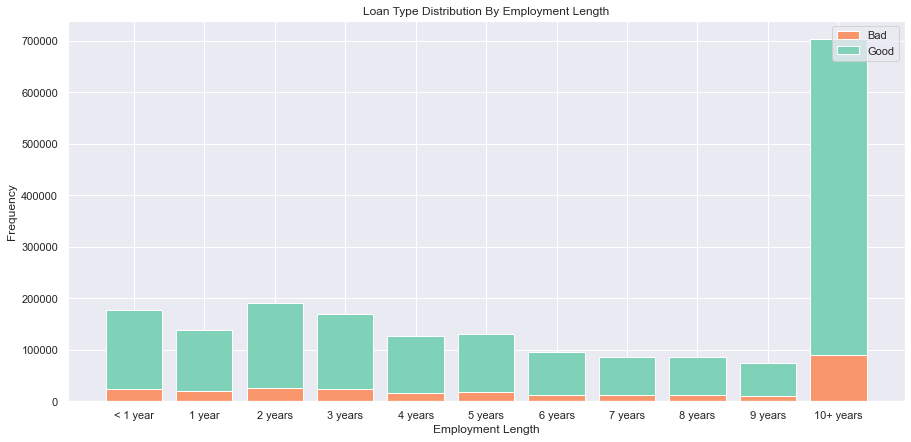

In [110]:
loan_df.employment_default_visualization()

**Observation:-**
    
Borrowers who work more than 10 years makes up a large proportion of the borrower population. Despite that, the percentage of them defaulting on a loan is very low as compared to borrowers who work less than 10 years. One possible reason behind this is that people from this group generally earns a higher income

### Grade vs Loan Status:-

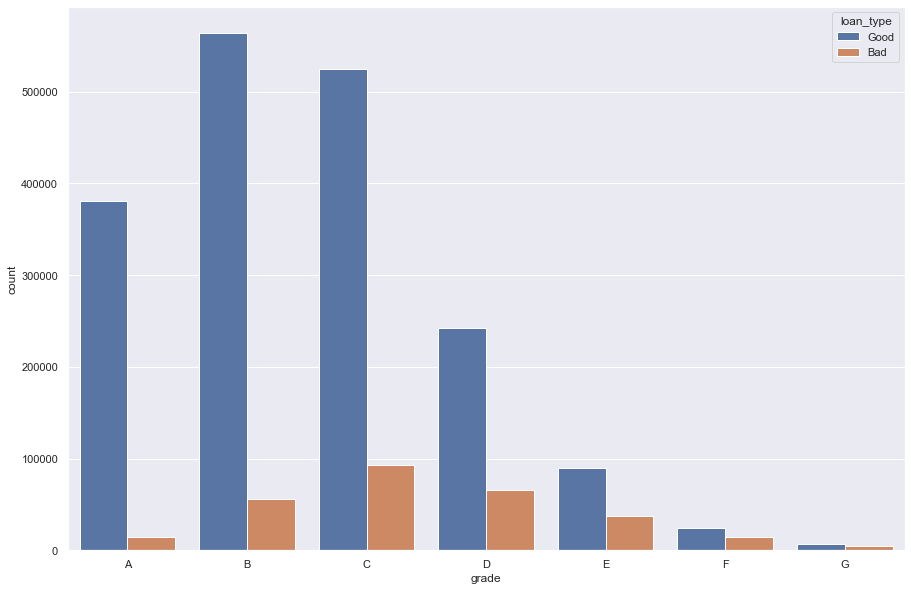

In [111]:
loan_df.grade_status_visualization()

**Observation**:-

As grade goes higher the count of bad loans increases. There is a higher risk in allocating loan to candidates with a higher grade.<br>
Grade C onwards has higher loan good to bad ratio.

### Correlation between Interest Rate and Annual Income:-

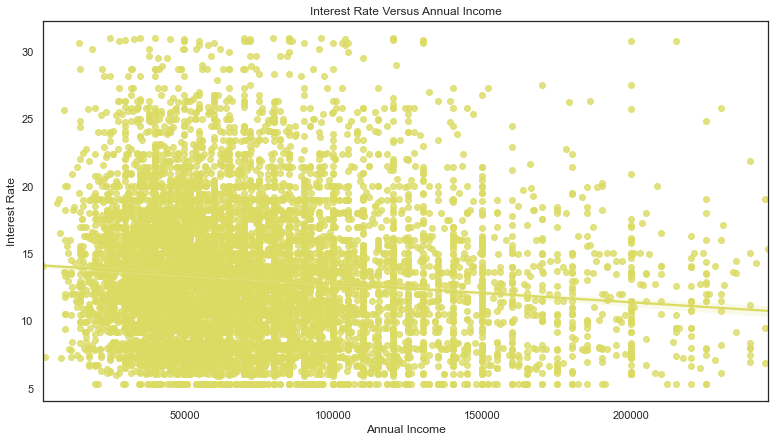

In [112]:
loan_df.interest_income_visualization()

**Observation:-**

The correlation between annual income and interest rate is not evident. But it looks like those who earn more annually generally enjoy a lower interest rate for loans.

### Loan Term and Loan Status:-

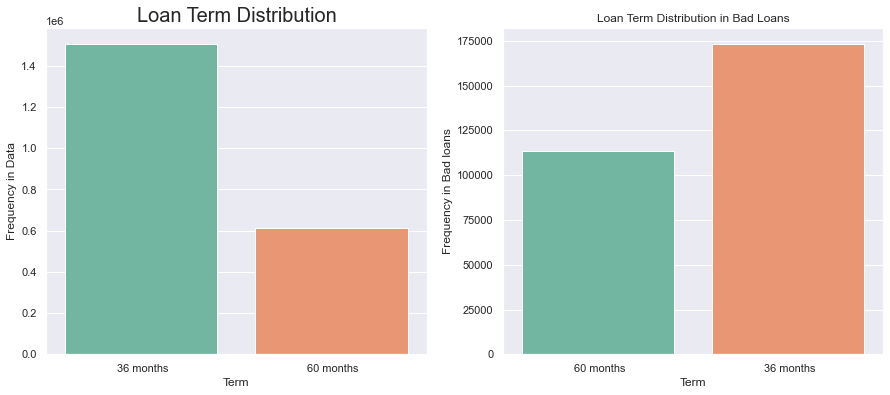

In [113]:
loan_df.term_status_visualization()

**Observation**:-

Around 75% of the total loans are given for duration of 3 years. while just 25% of the loans are those given for 5 years<br>
Among Bad loans, percentage of term 60 months rises to about 45%. The higher term loans have a higher chance of default

### Interest Rate and Loan Grade:-

               count       mean       std   min    25%    50%    75%    max
loan_type                                                                  
Bad         286828.0  15.756988  4.976453  5.31  12.29  15.05  18.55  30.99
Good       1833304.0  12.742210  4.703322  5.31   9.17  12.13  15.31  30.99


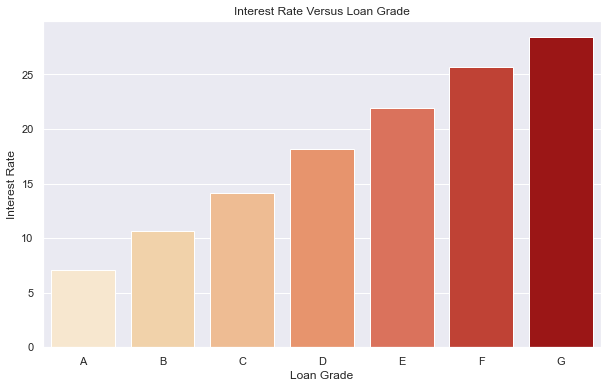

In [114]:
loan_df.interest_grade_visualization()

**Observation**:- 

The intrest rate for Bad loans appear to be higher than for Good loans. This is naturally expected, As, the risk increases the rate of interest imposed on the loan also increases. <br>

The average interest rate is higher when the grade is lower.

## Conclusion:-

In this lending club dataset, we have tried to investigate a few properties of data, in relation with loan data set

We found out the following observations:-

1) The amount of loans given by Lending club has increased massively(almost 50x) after 2013<br>
2) We removed outlier values of annual income and avg_current_balance as that were not representative of actual data<br>
3) Debt Consolidation is the most common reason for loan request<br>
4) One interesting finding is that there is a drastically lower Default percentage than expected. This is most likely due to the prevalence of restructuring loans<br>
5) The data is imbalanced with a majority of Good loans<br>
6) Borrowers who have higher annual income are more likely to pay off the loan on time<br>
7) Borrowers employed for a long time are less likely to default on a loan due to higher annual income<br>
8) It looks like those who earn more annually generally enjoy a lower interest rate for loans.<br>
9) The higher term loans have a higher chance of default<br>
10) The average interest rate is higher when the grade is lower.<br>
11) As grade goes higher the count of bad loans increases. There is a higher risk in allocating loan to candidates with a higher grade.<br>